# Faces

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import torch.nn as nn
import torch
from torchvision import datasets, transforms, io

# Create data for training

In [2]:
from torch.utils.data import DataLoader 
from data_manipulation.faces import FacesDataset

data_dir = 'data/img_align_celeba/img_align_celeba/'
dataset = FacesDataset(data_dir)
dataloader = DataLoader(dataset, batch_size=10)

2023-10-18 23:29:50.348723: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

dataset = datasets.ImageFolder(root="data/img_align_celeba/", transform=transform)

transform = transforms.Compose([transforms.Resize((128,128)),
                                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])
test_image = io.read_image("data/img_align_celeba/img_align_celeba/000001.jpg")
print(test_image.shape)
new_image = transform(test_image)
print(new_image.shape)
plt.imshow(new_image.permute((1,2,0)))

# Define Discriminator & Generator

## Layer's Architecture

In [1]:


class Generator(nn.Module):
    def __init__(self, input_length: int):
        super(Generator, self).__init__()
        self.dense_layer = nn.Linear(int(input_length), int(input_length))
        self.activation = nn.Sigmoid()

    def forward(self, x):
        return self.activation(self.dense_layer(x))


class Discriminator(nn.Module):
    def __init__(self, input_length: int):
        super(Discriminator, self).__init__()
        self.dense = nn.Linear(int(input_length), 1);
        self.activation = nn.Sigmoid()

    def forward(self, x):
        return self.activation(self.dense(x))
    

## Optimizers and loss functions

In [3]:
from models.faces import FaceGenerator,FaceDiscriminator

input_length = 100

generator = FaceGenerator(input_length)
discriminator = FaceDiscriminator()
loss = nn.BCELoss()
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.001)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.001)

# Train GAN

In [4]:
noise = torch.tensor(np.random.normal(0, 1, (10, input_length)), dtype=torch.float)
fake_data = generator(noise)
print(fake_data.shape)

torch.Size([10, 3, 128, 128])


In [ ]:
from trainers.general_trainer import Trainer
trainer = Trainer(generator, discriminator, loss, loss, generator_optimizer, discriminator_optimizer)
trainer.train(dataloader, input_length)

torch.Size([2, 3, 128, 128])


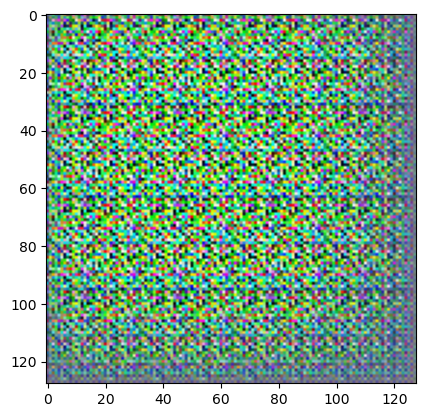

In [28]:
noise = torch.tensor(np.random.normal(0, 1, (2, 100)), dtype=torch.float)
generator = torch.load("saved_models/generator_300.pth")
fake_image = generator(noise)
print(fake_image.shape)


new_image = fake_image[0].detach()
new_image = (new_image + 1)/2
plt.imshow(new_image.permute((1,2,0)))


In [ ]:
batch_size = 16
image_height = 128
image_width = 128
num_channels = 3

# Generate random input data
random_input = torch.randn(batch_size, num_channels, image_height, image_width)

# Print the shape of the random input data
print(random_input.shape)


In [ ]:
noise = torch.tensor(np.random.normal(0, 1, (4, 10)), dtype=torch.float)
print(noise.size(0))

In [ ]:
class SimpleRegressionModel(nn.Module):
    def __init__(self):
        super(SimpleRegressionModel, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc = nn.Sequential(
            nn.Linear(128 * 32 * 32, 256),  # Adjust input size based on your image dimensions
            nn.ReLU(inplace=True),
            nn.Linear(256, 1)  # Output layer with one value
        )

    def forward(self, x):
        x = self.features(x)
        print(x.shape)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc(x)
        return x

# Create an instance of the model
model = SimpleRegressionModel()


model(random_input)